## Problem Definition

Flysafe Analytics is a sub-division of Flysafe Airlines which is an international Airline company. All the data management and processes for Flysafe Airlines are handled by Flysafe Analytics. The analytics company does sales forecasting, social media analysis and digital marketing analysis. It has a strong team of Data Scientists, Data Engineers, ML Engineers, MLOps and Business consultants with in-depth knowledge and experience in solving data-related problems such as social media analytics, customer insights, customer analytics, forecasting, sales and promotion planning, scheduling, pricing and revenue management.

The sales department has reported that ticket sales have fluctuated drastically and as a part of finding out the reason for changes in sales, the data team is analysing data from different domains. One of the team is analysing the customer review collected from the website. Data from earlier years were stored in an on-premise system and recent data are stored in DynamoDb. You are assigned to the same team as ML Engineer. The objective of this team is to find out the sentiment from the customer review. Since the data is present on both on-premise and cloud your team’s responsibility is to find the best ways to collect the data and perform sentiment analysis in it.

## Solution

To solve this problem, we will follow the typical machine learning method. We will first import the required libraries and the dataset. We will then do exploratory data analysis to see if we can find any trends in the dataset. Next, we will perform text preprocessing to convert textual data to numeric data that can be used by a macgine learning algorithm.Then we apply 
Pre - trained model and made  word cloud from the reviews. After that, e will use machine learning algorithms to train and test our sentiment analysis models. In the end , we apply TPOT which is a Python Automated Machine Learning tool to check best pipeline for our data.

## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings

In [63]:
!pip install s3fs

Defaulting to user installation because normal site-packages is not writeable


### data  facts and import

In [2]:
#Loading dataset from s3 directly to our notebook
bucket = 's3://flysafeaip'
data_key = 'fly_dataset.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
df = pd.read_csv(data_location)

In [3]:
df.head()

,number,comment,label
0,0,"Mohammad harun, he is an awesome guy very info...",Postive
1,1,"amazing guy gaurav was, so patience and kind. ...",Postive
2,2,Gaurav was very knowledgeable and very helpful...,Postive
3,3,I called them regarding my flight cancellation...,Postive
4,4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,Postive


In [4]:
df.shape #printing total no of rows & columns

(151135, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151135 entries, 0 to 151134
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   number   151135 non-null  int64 
 1   comment  151135 non-null  object
 2   label    151135 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [6]:
#replacing positive and negative with 0 and 1

df['label'].replace('Postive',1,inplace =True)
df['label'].replace('Negative', 0, inplace = True)
df

,number,comment,label
0,0,"Mohammad harun, he is an awesome guy very info...",1
1,1,"amazing guy gaurav was, so patience and kind. ...",1
2,2,Gaurav was very knowledgeable and very helpful...,1
3,3,I called them regarding my flight cancellation...,1
4,4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1
...,...,...,...
151130,151130,"Good price, friendly service-including, checki...",1
151131,151131,Reservations where easy to make online We drop...,1
151132,151132,"Very easy booking process, looks up best parki...",1
151133,151133,Very polite and helpful staff. I had problem m...,1


In [7]:
#removing column

df1 = df.drop(['number'],axis = 1)
df1

,comment,label
0,"Mohammad harun, he is an awesome guy very info...",1
1,"amazing guy gaurav was, so patience and kind. ...",1
2,Gaurav was very knowledgeable and very helpful...,1
3,I called them regarding my flight cancellation...,1
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1
...,...,...
151130,"Good price, friendly service-including, checki...",1
151131,Reservations where easy to make online We drop...,1
151132,"Very easy booking process, looks up best parki...",1
151133,Very polite and helpful staff. I had problem m...,1


In [8]:
df1.describe().transpose()         
#transpose() converts the row elements into column elements and the column elements into row elements

,count,mean,std,min,25%,50%,75%,max
label,151135.0,0.840983,0.365693,0.0,1.0,1.0,1.0,1.0


In [9]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###



count = df1.isnull().sum().sort_values(ascending=False)
percentage = ((df1.isnull().sum()/len(df1)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
comment,0,0.0
label,0,0.0


In [10]:
# duplicate value

df1.comment.duplicated().sum()

1477

In [11]:
# Considering certain columns for dropping duplicates
df1 = df1.drop_duplicates(subset=['comment', 'label'], keep='first')

In [12]:
df1.shape

(149758, 2)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149758 entries, 0 to 151134
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  149758 non-null  object
 1   label    149758 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


Percentage for default

1    83.98
0    16.02
Name: label, dtype: float64


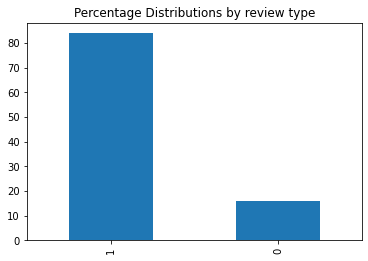

In [14]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df1.label.value_counts(normalize=True)*100,2))
round(df1.label.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

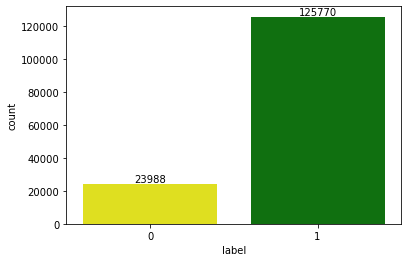

In [15]:
ax = sns.countplot(data =df1, x = "label", palette=["yellow","green"])
ax.bar_label(ax.containers[0]);

Text(0.5, 1.0, 'Sentiment Proportion')

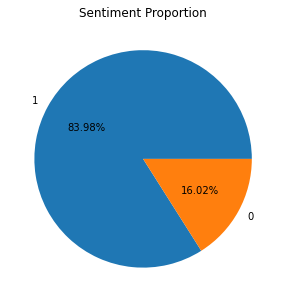

In [16]:
#df1['label'].value_counts.plot(kind = 'pie')
plt.figure(figsize=(10,5))
plt.pie(df1['label'].value_counts(), labels=df['label'].value_counts().index, autopct="%2.2f%%")
plt.title('Sentiment Proportion')

In [17]:
df1["label"].value_counts()

1    125770
0     23988
Name: label, dtype: int64

### Cleaning Data

In [18]:
df1["comment"].head()

0    Mohammad harun, he is an awesome guy very info...
1    amazing guy gaurav was, so patience and kind. ...
2    Gaurav was very knowledgeable and very helpful...
3    I called them regarding my flight cancellation...
4    VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...
Name: comment, dtype: object

In [19]:
# Apply first level cleaning
import re
import string


In [20]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def cleaning(data):
    
    import re
    
    # To remove URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    # To remove Tags
    data = re.sub('#\S+', '', data).strip()

    # To remove Mentions
    data = re.sub('@\S+', '', data).strip()
    
    # To remove upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    # Tokenizing
    text_tokens = word_tokenize(data.lower())
    
    # To remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    # To removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    # Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [22]:
import nltk
nltk.download('punkt')

nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
cleaning_text = df1["comment"].apply(cleaning)
cleaning_text.head()

0    mohammad harun awesome guy informative helpful...
1    amazing guy gaurav patience kind helped start ...
2    gaurav knowledgeable helpful know situation ab...
3    called regarding flight cancellation narrated ...
4    good service gaurav lohat served soon reached ...
Name: comment, dtype: object

In [24]:
cleaning_text

0         mohammad harun awesome guy informative helpful...
1         amazing guy gaurav patience kind helped start ...
2         gaurav knowledgeable helpful know situation ab...
3         called regarding flight cancellation narrated ...
4         good service gaurav lohat served soon reached ...
                                ...                        
151130    good price friendly checking shuttle service v...
151131    reservation easy make online dropped car van w...
151132    easy booking process look best parking deal na...
151133    polite helpful staff problem making reservatio...
151134    ez parking proven best choice sjc airport parking
Name: comment, Length: 149758, dtype: object

In [25]:
# Let's take a look at the updated text
#df1['cleaned_description'] = pd.DataFrame(df1.comment.apply(cleaned1))
df1["cleaned_des"] = cleaning_text
df1.head(10)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\72284212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cleaned_des"] = cleaning_text


,comment,label,cleaned_des
0,"Mohammad harun, he is an awesome guy very info...",1,mohammad harun awesome guy informative helpful...
1,"amazing guy gaurav was, so patience and kind. ...",1,amazing guy gaurav patience kind helped start ...
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful know situation ab...
3,I called them regarding my flight cancellation...,1,called regarding flight cancellation narrated ...
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,good service gaurav lohat served soon reached ...
5,We have had very good experience with Flydealf...,1,good experience flydealfare always mohamed har...
6,I'd like to highly commend your staffs from he...,1,id like highly commend staff helping colleague...
7,"Addicted to Trustpilot, has everything you nee...",1,addicted trustpilot everything need customer s...
8,I would like to whole heartedly thank Mr Moham...,1,would like whole heartedly thank mr mohammed t...
9,"Hi Mohd, I wanted to thank Mohd what a amazing...",1,hi mohd wanted thank mohd amazing guy made won...


## Vader 

In [27]:
pip install nltk vaderSentiment pandas numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [28]:
df1['score'] = df1['cleaned_des'].apply(lambda comment : sid.polarity_scores(comment))
df1.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\1745312266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['score'] = df1['cleaned_des'].apply(lambda comment : sid.polarity_scores(comment))


,comment,label,cleaned_des,score
0,"Mohammad harun, he is an awesome guy very info...",1,mohammad harun awesome guy informative helpful...,"{'neg': 0.091, 'neu': 0.526, 'pos': 0.382, 'co..."
1,"amazing guy gaurav was, so patience and kind. ...",1,amazing guy gaurav patience kind helped start ...,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp..."
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful know situation ab...,"{'neg': 0.097, 'neu': 0.615, 'pos': 0.287, 'co..."
3,I called them regarding my flight cancellation...,1,called regarding flight cancellation narrated ...,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp..."
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,good service gaurav lohat served soon reached ...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."


In [29]:
df1['compound'] = df1['score'].apply(lambda score_dict: score_dict['compound'])
df1.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\4187957488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['compound'] = df1['score'].apply(lambda score_dict: score_dict['compound'])


,comment,label,cleaned_des,score,compound
0,"Mohammad harun, he is an awesome guy very info...",1,mohammad harun awesome guy informative helpful...,"{'neg': 0.091, 'neu': 0.526, 'pos': 0.382, 'co...",0.8516
1,"amazing guy gaurav was, so patience and kind. ...",1,amazing guy gaurav patience kind helped start ...,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",0.9042
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful know situation ab...,"{'neg': 0.097, 'neu': 0.615, 'pos': 0.287, 'co...",0.5719
3,I called them regarding my flight cancellation...,1,called regarding flight cancellation narrated ...,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.5994
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,good service gaurav lohat served soon reached ...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6486


In [30]:
df1['comp_score'] = df1['compound'].apply(lambda c: 1 if c>= 0 else 0)
df1.head(45)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\3013178052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['comp_score'] = df1['compound'].apply(lambda c: 1 if c>= 0 else 0)


,comment,label,cleaned_des,score,compound,comp_score
0,"Mohammad harun, he is an awesome guy very info...",1,mohammad harun awesome guy informative helpful...,"{'neg': 0.091, 'neu': 0.526, 'pos': 0.382, 'co...",0.8516,1
1,"amazing guy gaurav was, so patience and kind. ...",1,amazing guy gaurav patience kind helped start ...,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",0.9042,1
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful know situation ab...,"{'neg': 0.097, 'neu': 0.615, 'pos': 0.287, 'co...",0.5719,1
3,I called them regarding my flight cancellation...,1,called regarding flight cancellation narrated ...,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.5994,0
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,good service gaurav lohat served soon reached ...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6486,1
5,We have had very good experience with Flydealf...,1,good experience flydealfare always mohamed har...,"{'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'comp...",0.9153,1
6,I'd like to highly commend your staffs from he...,1,id like highly commend staff helping colleague...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",0.9162,1
7,"Addicted to Trustpilot, has everything you nee...",1,addicted trustpilot everything need customer s...,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...",0.6249,1
8,I would like to whole heartedly thank Mr Moham...,1,would like whole heartedly thank mr mohammed t...,"{'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'comp...",0.9723,1
9,"Hi Mohd, I wanted to thank Mohd what a amazing...",1,hi mohd wanted thank mohd amazing guy made won...,"{'neg': 0.0, 'neu': 0.437, 'pos': 0.563, 'comp...",0.9733,1


## Confusion matrix and Classfication report

In [50]:
# confusion matrix
print(confusion_matrix(df1['label'], df1['comp_score']))

[[ 10911  13077]
 [  9866 115904]]


In [51]:
print("Classification Report of VADER \n")
print(classification_report(df1['label'], df1['comp_score']))

Classification Report of VADER 

              precision    recall  f1-score   support

           0       0.53      0.45      0.49     23988
           1       0.90      0.92      0.91    125770

    accuracy                           0.85    149758
   macro avg       0.71      0.69      0.70    149758
weighted avg       0.84      0.85      0.84    149758



In [36]:
acc = accuracy_score(df1['label'], df1['comp_score'])
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 84.68%


In [35]:
# Recall score
recall = recall_score(df1['label'], df1['comp_score'])
print("Recall: {:.2f}%".format(recall * 100))

Recall: 92.16%


In [48]:
# Precision score
precision = precision_score(df1['label'],  df1['comp_score'])
print("Precision: {:.2f}%".format(precision * 100))

Precision: 89.86%


### TextBlob

TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks.


The polarity and subjectivity of a statement are returned by TextBlob. The range of polarity is [-1,1], with -1 indicating a negative sentiment and 1 indicating a positive sentiment

Subjectivity falls under the numeric range of [0,1]. The degree of personal opinion and factual information in a text is measured by subjectivity. 



In [37]:
from textblob import TextBlob

In [38]:
# create a function to get the subjectivity


def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# create a function to get polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#creating two columns

df1['Subjectivity'] = df1['cleaned_des'].apply(getSubjectivity)
df1['Polarity'] = df1['cleaned_des'].apply(getPolarity)


#show the new dataframe with new columns

df1

C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\3696086261.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Subjectivity'] = df1['cleaned_des'].apply(getSubjectivity)
C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\3696086261.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Polarity'] = df1['cleaned_des'].apply(getPolarity)


,comment,label,cleaned_des,score,compound,comp_score,Subjectivity,Polarity
0,"Mohammad harun, he is an awesome guy very info...",1,mohammad harun awesome guy informative helpful...,"{'neg': 0.091, 'neu': 0.526, 'pos': 0.382, 'co...",0.8516,1,0.600000,0.600000
1,"amazing guy gaurav was, so patience and kind. ...",1,amazing guy gaurav patience kind helped start ...,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",0.9042,1,0.471667,0.290000
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful know situation ab...,"{'neg': 0.097, 'neu': 0.615, 'pos': 0.287, 'co...",0.5719,1,0.362500,0.300000
3,I called them regarding my flight cancellation...,1,called regarding flight cancellation narrated ...,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.5994,0,0.535714,0.285714
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,good service gaurav lohat served soon reached ...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6486,1,0.600000,0.700000
...,...,...,...,...,...,...,...,...
151130,"Good price, friendly service-including, checki...",1,good price friendly checking shuttle service v...,"{'neg': 0.086, 'neu': 0.525, 'pos': 0.39, 'com...",0.8750,1,0.600000,0.145833
151131,Reservations where easy to make online We drop...,1,reservation easy make online dropped car van w...,"{'neg': 0.055, 'neu': 0.686, 'pos': 0.258, 'co...",0.8268,1,0.611810,0.375810
151132,"Very easy booking process, looks up best parki...",1,easy booking process look best parking deal na...,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.7964,1,0.566667,0.716667
151133,Very polite and helpful staff. I had problem m...,1,polite helpful staff problem making reservatio...,"{'neg': 0.079, 'neu': 0.38, 'pos': 0.541, 'com...",0.9300,1,0.050000,0.000000


In [39]:
# create a function to compute the negative, and positive analysis 


def getAnalysis(score):
    if score < 0:
        return 0
    else:
        return 1


    
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)

#show the dataframe

df1
        

C:\Users\Acer\AppData\Local\Temp\ipykernel_5632\2237361027.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Analysis'] = df1['Polarity'].apply(getAnalysis)


,comment,label,cleaned_des,score,compound,comp_score,Subjectivity,Polarity,Analysis
0,"Mohammad harun, he is an awesome guy very info...",1,mohammad harun awesome guy informative helpful...,"{'neg': 0.091, 'neu': 0.526, 'pos': 0.382, 'co...",0.8516,1,0.600000,0.600000,1
1,"amazing guy gaurav was, so patience and kind. ...",1,amazing guy gaurav patience kind helped start ...,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",0.9042,1,0.471667,0.290000,1
2,Gaurav was very knowledgeable and very helpful...,1,gaurav knowledgeable helpful know situation ab...,"{'neg': 0.097, 'neu': 0.615, 'pos': 0.287, 'co...",0.5719,1,0.362500,0.300000,1
3,I called them regarding my flight cancellation...,1,called regarding flight cancellation narrated ...,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.5994,0,0.535714,0.285714,1
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,1,good service gaurav lohat served soon reached ...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6486,1,0.600000,0.700000,1
...,...,...,...,...,...,...,...,...,...
151130,"Good price, friendly service-including, checki...",1,good price friendly checking shuttle service v...,"{'neg': 0.086, 'neu': 0.525, 'pos': 0.39, 'com...",0.8750,1,0.600000,0.145833,1
151131,Reservations where easy to make online We drop...,1,reservation easy make online dropped car van w...,"{'neg': 0.055, 'neu': 0.686, 'pos': 0.258, 'co...",0.8268,1,0.611810,0.375810,1
151132,"Very easy booking process, looks up best parki...",1,easy booking process look best parking deal na...,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.7964,1,0.566667,0.716667,1
151133,Very polite and helpful staff. I had problem m...,1,polite helpful staff problem making reservatio...,"{'neg': 0.079, 'neu': 0.38, 'pos': 0.541, 'com...",0.9300,1,0.050000,0.000000,1


In [42]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

## Classification report on Textblob and Confusion matrix

In [54]:
#Classification report of Textblob 
print("Classification report of Textblob \n")
print(classification_report(df1['label'], df1['Analysis']))

Classification report of Textblob 

              precision    recall  f1-score   support

           0       0.53      0.35      0.42     23988
           1       0.88      0.94      0.91    125770

    accuracy                           0.85    149758
   macro avg       0.71      0.65      0.67    149758
weighted avg       0.83      0.85      0.83    149758



In [44]:
#confusion matrix
print(confusion_matrix(df1['label'], df1['Analysis']))

[[  8438  15550]
 [  7532 118238]]


In [53]:
#accuracy
acc1 = accuracy_score(df1['label'], df1['Analysis'])
print("Accuracy: {:.2f}%".format(acc1 * 100))

Accuracy: 84.59%


In [55]:
# Recall score
recall = recall_score(df1['label'], df1['Analysis'])
print("Recall: {:.2f}%".format(recall * 100))

Recall: 94.01%


In [47]:
# Precision score
precision = precision_score(df1['label'],  df1['Analysis'])
print("Precision: {:.2f}%".format(precision * 100))

Precision: 88.38%


## WordCloud - Repetition of Words

### Detect Reviews (positive and negative separately)

In [49]:
positive_sentences = df1[df1["label"] == 1]["cleaned_des"]
#positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0         mohammad harun awesome guy informative helpful...
1         amazing guy gaurav patience kind helped start ...
2         gaurav knowledgeable helpful know situation ab...
3         called regarding flight cancellation narrated ...
4         good service gaurav lohat served soon reached ...
                                ...                        
151130    good price friendly checking shuttle service v...
151131    reservation easy make online dropped car van w...
151132    easy booking process look best parking deal na...
151133    polite helpful staff problem making reservatio...
151134    ez parking proven best choice sjc airport parking
Name: cleaned_des, Length: 125770, dtype: object

In [50]:
negative_sentences = df1[df1["label"] == 0]["cleaned_des"]
#negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

37        nothing trouble dealing company pandemic gotte...
63        ankush great help explained everything clearly...
186       scaaaam dont want give refund ordy received re...
190       asap ticket scam refused give money back fligh...
199       far good asap ticket team especially benjamin ...
                                ...                        
151077    well planned give book higher rating called co...
151086    customer service didnt give answer question re...
151094                good price good serice quick response
151112    booked flight via april bought plus package tw...
151121    recently bought flight kiwi stansted amman ret...
Name: cleaned_des, Length: 23988, dtype: object

## Collect Words (positive and negative separately)

In [51]:
positive_words = " ".join(positive_sentences)
positive_words[:30000]

'mohammad harun awesome guy informative helpful helped booking flight india emergency situation finished formality really thankful team rock harun amazing guy gaurav patience kind helped start end also went way give extra information first time booking flydealfare website book future thats agent like gaurav thank gaurav gaurav knowledgeable helpful know situation able job professionally feel pressured buy rush follow also helpful called regarding flight cancellation narrated worry polite assisting told anytime cancel flight process refund right away good service gaurav lohat served soon reached travel need must give chance good experience flydealfare always mohamed harun helpful answering complex itinerary made easy u thank support id like highly commend staff helping colleague usually one recommending site store first time endorsing thanks helpful addicted trustpilot everything need customer service great friendy reply fast via email phone concern inquires would like whole heartedly t

In [52]:
negative_words = " ".join(negative_sentences)
negative_words[:30000]

'nothing trouble dealing company pandemic gotten total run around trying get refund flight changed despite fact department transportation instructed airline amidst travel dilemma trying get resolve since early june put least dozen time even get scheduled flight destination allow american agent steve answer voicemail answer phone never use consolidator business certainly one customer service agent company might interested helping u please respond review told must pay fee ticket husband get money back senior citizen compromising health condition take flight even allowed eu one seems care ankush great help explained everything clearly nicely first experience mintfares great due guy scaaaam dont want give refund ordy received refund form lofhanza said cant give refund lofhanza send refund stealing money never give fighting get money guy go bankruptcy careful recommended asap ticket scam refused give money back flight cancelled agent dominic insisting cant speak manager legal team charging 

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [54]:
#pip install wordcloud

In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
from wordcloud import WordCloud

In [57]:

wordcloud_positive = WordCloud(background_color="white", max_words =15000)

In [58]:
wordcloud_positive.generate(positive_words)

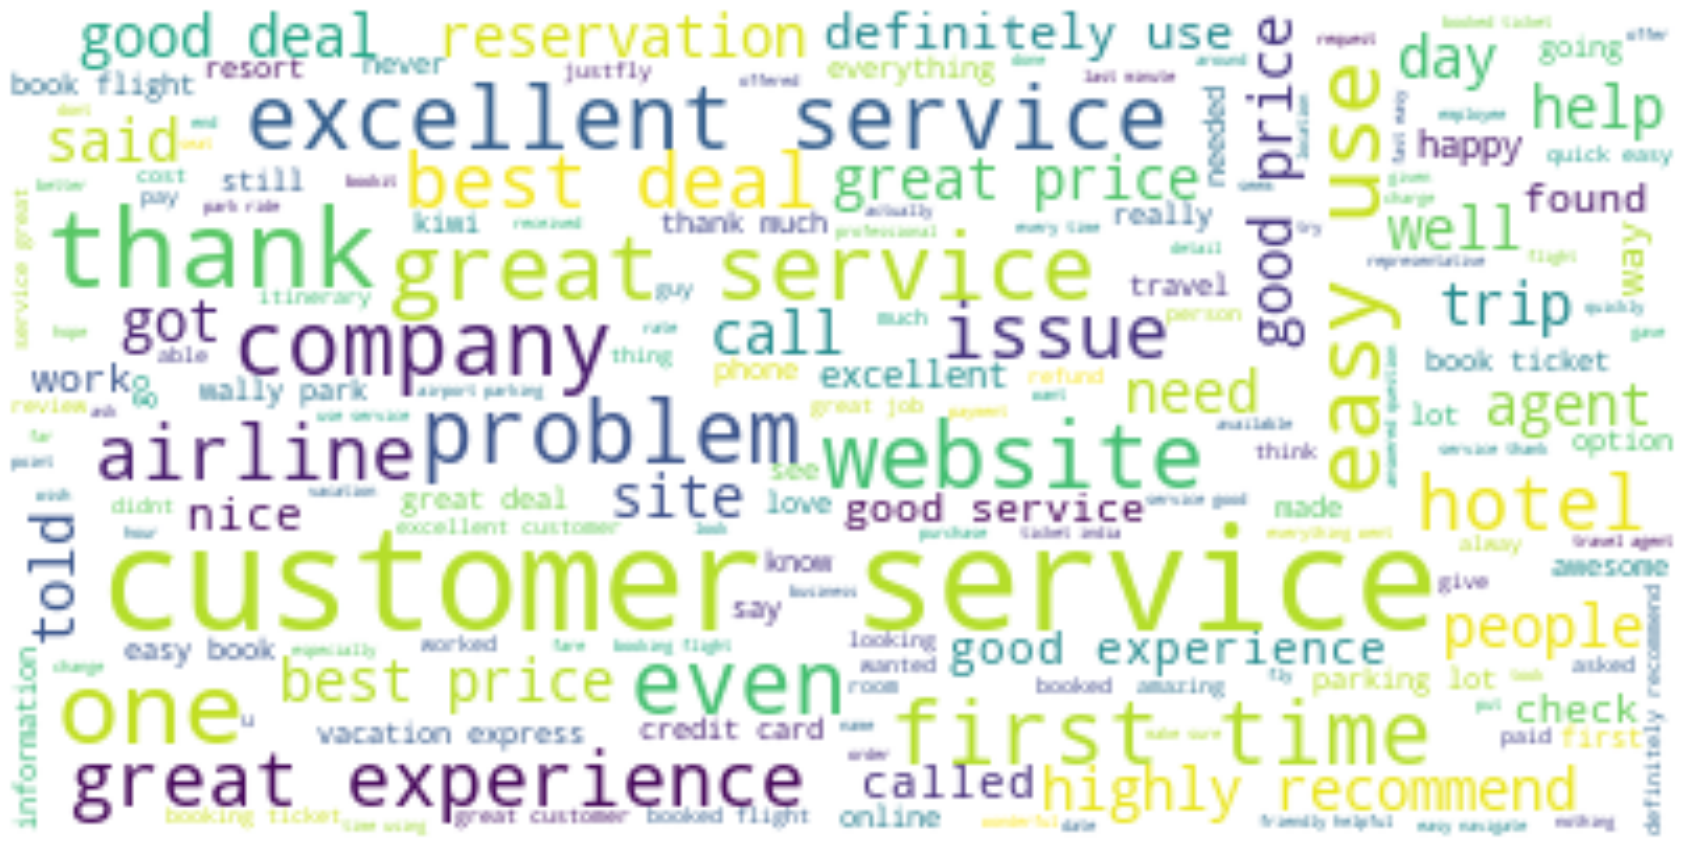

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,25))
plt.imshow(wordcloud_positive, interpolation="bilinear",) # interpolation=colour
plt.axis("off")
plt.show()

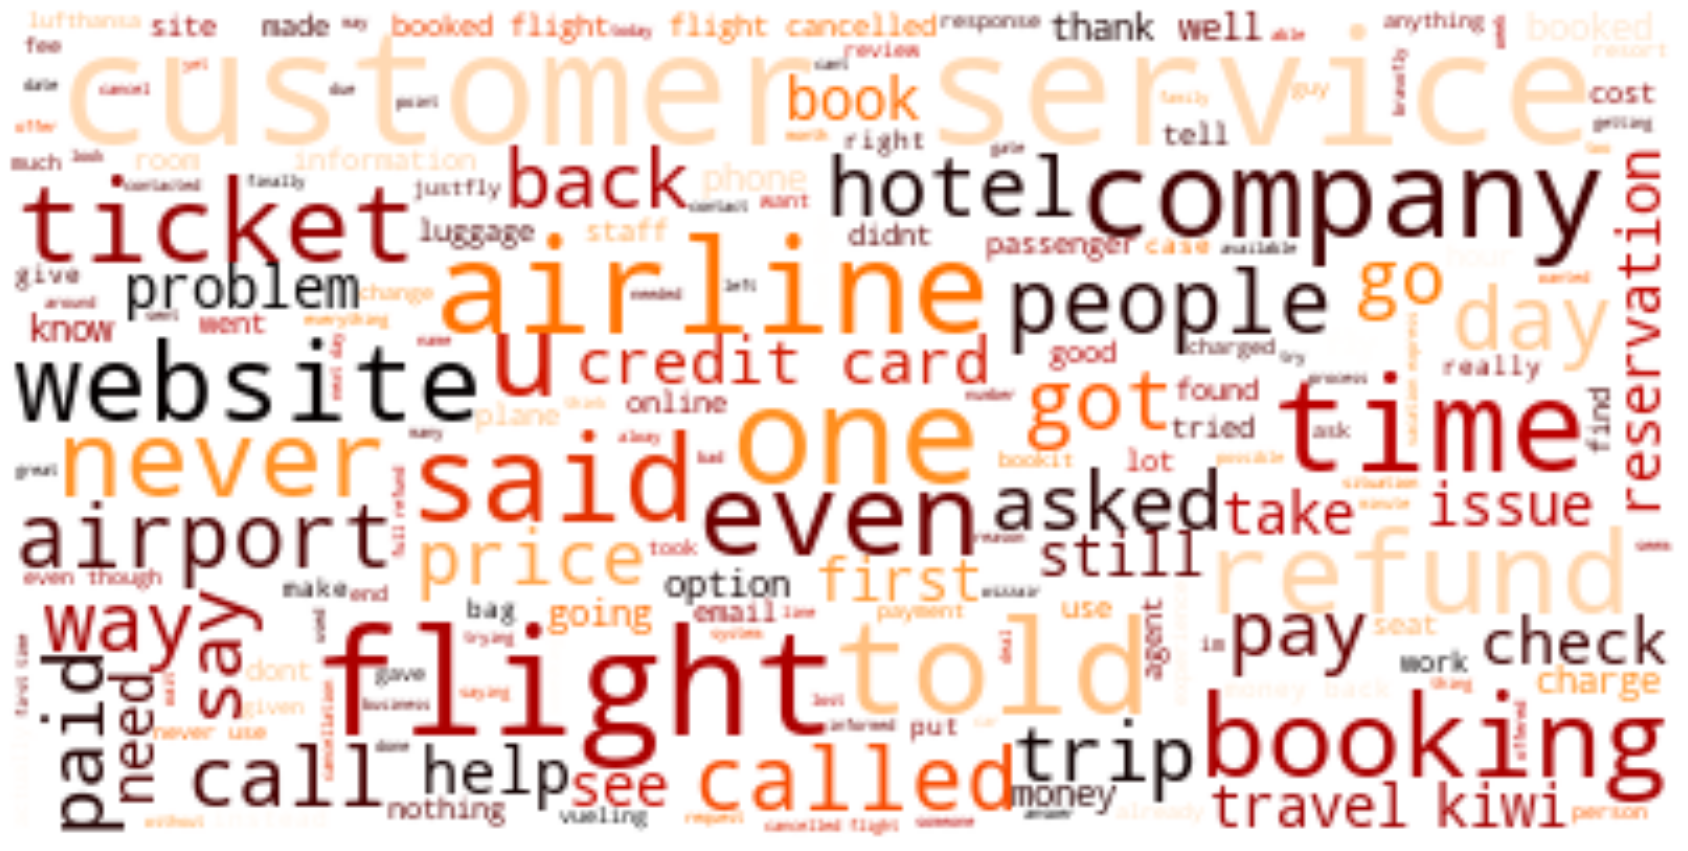

In [60]:
wordcloud_negative = WordCloud(background_color="white", max_words=15000, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(30,25))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()


## Sentiment Classification with Machine Learning 

#### Before moving on to modeling, as data preprocessing steps you will need to perform TF - IDF vectorization and train-test split. You have performed many times train test split process before. But you will perform the vectorization for the first time.

### Train Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df1["cleaned_des"]
y = df1["label"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=101)

## TF ( Time Frequency ) - IDF ( Inverse Document Frequency )

#### TF-IDF definition: “term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

#### TF: Term Frequency measures how frequently a term occurs in a document as every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus TF is:

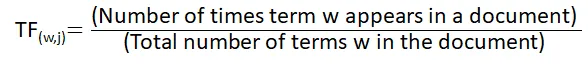

#### IDF: Inverse Document Frequency measures how important a term is. In TF, all terms are considered equally important. Thus we need to weigh down the frequent terms while scaling up the rare ones, by computing the following:


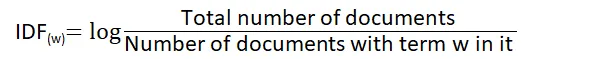

In [59]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:

tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

## naive bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=4)
nb.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=4)

In [63]:
y_pred = nb.predict(X_test_tf_idf)

In [64]:
cm = confusion_matrix(y_test, y_pred)

print("confusion matrix \n ", cm)

print('\n')
# Actual correct values
correct_values = cm.diagonal().sum()


print('\n')
print("Actual correct values: {}".format(correct_values))

print('\n')
# Total actual wrong values
total_wrong_values = (cm.sum() - cm.diagonal().sum())



print("Total actual wrong values: {}".format(total_wrong_values))

acc = accuracy_score(y_test,y_pred)
print("\n")

print("Accuracy: {:.2f}%".format(acc * 100))
print("\n")

print(classification_report(y_test, y_pred))
#print("NB MODEL")
#eval(nb, X_train_tf_idf, X_test_tf_idf)

confusion matrix 
  [[ 2114  3883]
 [  638 30805]]




Actual correct values: 32919


Total actual wrong values: 4521


Accuracy: 87.92%


              precision    recall  f1-score   support

           0       0.77      0.35      0.48      5997
           1       0.89      0.98      0.93     31443

    accuracy                           0.88     37440
   macro avg       0.83      0.67      0.71     37440
weighted avg       0.87      0.88      0.86     37440



## SVM 



In [69]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [70]:
print("SVC MODEL")

print("\n")

y_pred1 = svc.predict(X_test_tf_idf)


cm_svm = confusion_matrix(y_test, y_pred1)

print("confusion matrix \n \n", cm_svm)

print('\n')
# Actual correct values
correct_values_svm = cm_svm.diagonal().sum()

print("Actual correct values: {}".format(correct_values_svm))


# Total actual wrong values
total_wrong_values_svm = (cm_svm.sum() - cm_svm.diagonal().sum())



print("Total actual wrong values: {}".format(total_wrong_values_svm))


acc_svm = accuracy_score(y_test,y_pred1)

print("\n")

print("Accuracy: {:.2f}%".format(acc_svm * 100))
print("\n")

print("Classification Report for SVM Model \n\n ", classification_report(y_test, y_pred1))


SVC MODEL


confusion matrix 
 
 [[ 2562  3435]
 [  932 30511]]


Actual correct values: 33073
Total actual wrong values: 4367


Accuracy: 88.34%


Classification Report for SVM Model 

                precision    recall  f1-score   support

           0       0.73      0.43      0.54      5997
           1       0.90      0.97      0.93     31443

    accuracy                           0.88     37440
   macro avg       0.82      0.70      0.74     37440
weighted avg       0.87      0.88      0.87     37440



## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 55, random_state = 10)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=55, random_state=10)

In [72]:
print("RF MODEL")


print("\n")

pred_rf = rf.predict(X_test_tf_idf)


cm_rf = confusion_matrix(y_test, pred_rf)

print("confusion matrix \n\n ", cm_rf)

print('\n')

# Actual correct values

correct_values = cm_rf.diagonal().sum()

print("Actual correct values: {}".format(correct_values))


# Total actual wrong values
total_wrong_values = (cm_svm.sum() - cm_svm.diagonal().sum())



print("Total actual wrong values: {}".format(total_wrong_values))


acc_rf = accuracy_score(y_test,pred_rf)

print("\n")

print("Accuracy: {:.2f}%".format(acc_rf * 100))
print("\n")

print("Classification Report for SVM Model \n\n ", classification_report(y_test, pred_rf))



RF MODEL


confusion matrix 

  [[ 1866  4131]
 [  569 30874]]


Actual correct values: 32740
Total actual wrong values: 4367


Accuracy: 87.45%


Classification Report for SVM Model 

                precision    recall  f1-score   support

           0       0.77      0.31      0.44      5997
           1       0.88      0.98      0.93     31443

    accuracy                           0.87     37440
   macro avg       0.82      0.65      0.69     37440
weighted avg       0.86      0.87      0.85     37440



## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=2000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=2000)

In [74]:
print("LOGISTIC MODEL")


print("\n")

pred_lg = log.predict(X_test_tf_idf)


cm_lg = confusion_matrix(y_test, pred_lg)

print("confusion matrix \n\n ", cm_lg)

print('\n')

# Actual correct values

correct_values = cm_lg.diagonal().sum()

print("Actual correct values: {}".format(correct_values))


# Total actual wrong values
total_wrong_values = (cm_lg.sum() - cm_lg.diagonal().sum())



print("Total actual wrong values: {}".format(total_wrong_values))


acc_lg = accuracy_score(y_test,pred_lg)

print("\n")

print("Accuracy: {:.2f}%".format(acc_rf * 100))
print("\n")

print("Classification Report for Logistic Regression Model \n\n ", classification_report(y_test, pred_lg))




LOGISTIC MODEL


confusion matrix 

  [[ 2554  3443]
 [  922 30521]]


Actual correct values: 33075
Total actual wrong values: 4365


Accuracy: 87.45%


Classification Report for Logistic Regression Model 

                precision    recall  f1-score   support

           0       0.73      0.43      0.54      5997
           1       0.90      0.97      0.93     31443

    accuracy                           0.88     37440
   macro avg       0.82      0.70      0.74     37440
weighted avg       0.87      0.88      0.87     37440



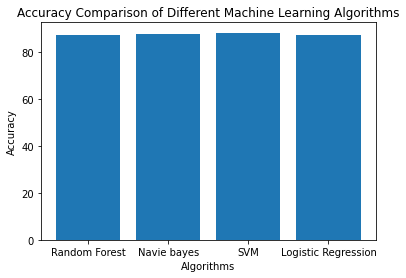

In [75]:
algorithms = ['Random Forest', 'Navie bayes','SVM', 'Logistic Regression']
accuracies = [87.45,87.92, 88.34,87.45]

plt.bar(algorithms, accuracies)
plt.title('Accuracy Comparison of Different Machine Learning Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [76]:
pip install tpot

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [89]:
from tpot import TPOTClassifier

In [90]:
pipeline_optimizer = TPOTClassifier()

In [91]:
from tpot import TPOTClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

In [92]:
# Define the TPOT pipeline
pipeline_optimizer = TPOTClassifier(generations=50 , population_size=20, cv=5,
                                    random_state=42, verbosity=2, config_dict = 'TPOT sparse')

In [82]:
# Train the TPOT model on train data

pipeline_optimizer.fit(X_train_tf_idf, y_train)

Optimization Progress:   0%|          | 0/1020 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8841859941920319

Generation 2 - Current best internal CV score: 0.8857084594191168

Generation 3 - Current best internal CV score: 0.8857084594191168

Generation 4 - Current best internal CV score: 0.8857084594191168

Generation 5 - Current best internal CV score: 0.8857084594191168

Generation 6 - Current best internal CV score: 0.8857084594191168

Generation 7 - Current best internal CV score: 0.8857084594191168

Generation 8 - Current best internal CV score: 0.8857084594191168

Generation 9 - Current best internal CV score: 0.8857084594191168

Generation 10 - Current best internal CV score: 0.8857084594191168

Generation 11 - Current best internal CV score: 0.8857084594191168

Generation 12 - Current best internal CV score: 0.8857084594191168

Generation 13 - Current best internal CV score: 0.8857084594191168

Generation 14 - Current best internal CV score: 0.8857084594191168

Generation 15 - Current best internal CV score: 0.885708

TPOTClassifier(config_dict='TPOT sparse', generations=50, population_size=20,
               random_state=42, verbosity=2)

In [86]:

print(pipeline_optimizer.score(X_train_tf_idf, y_train))

0.8835271283320572


In [84]:
# Train the TPOT model on test data

pipeline_optimizer.fit(X_test_tf_idf, y_test)

Optimization Progress:   0%|          | 0/1020 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8798344017094017

Generation 2 - Current best internal CV score: 0.8798344017094017

Generation 3 - Current best internal CV score: 0.8798344017094017

Generation 4 - Current best internal CV score: 0.8806089743589745

Generation 5 - Current best internal CV score: 0.8813034188034188

Generation 6 - Current best internal CV score: 0.8813034188034188

Generation 7 - Current best internal CV score: 0.8813034188034188

Generation 8 - Current best internal CV score: 0.8813034188034188

Generation 9 - Current best internal CV score: 0.8813034188034188

Generation 10 - Current best internal CV score: 0.8815972222222224

Generation 11 - Current best internal CV score: 0.8815972222222224

Generation 12 - Current best internal CV score: 0.8816239316239317

Generation 13 - Current best internal CV score: 0.8816239316239317

Generation 14 - Current best internal CV score: 0.8817574786324787

Generation 15 - Current best internal CV score: 0.881864

TPOTClassifier(config_dict='TPOT sparse', generations=50, population_size=20,
               random_state=42, verbosity=2)

In [85]:
# Evaluate the model on the testing data
#score() method returns the accuracy of the model.

print(pipeline_optimizer.score(X_test_tf_idf, y_test))

0.8902777777777777


In [87]:
# Export the best model
pipeline_optimizer.export('sentiment_analysis_pipeline.py')

In [97]:
import os


# Get the current working directory
cwd = os.getcwd()

# Print the path to the exported pipeline
print(os.path.join(cwd, 'sentiment_analysis_pipeline.py'))

C:\Users\Acer\machine_learning\sample_davinder1\sentiment_analysis_pipeline.py
